In [1]:
import openmc
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 

In [2]:
'''
    Deifining Element in the pincell
'''
uo2 =  openmc.Material(1, "uo2")
uo2.add_element('U', 1.0, enrichment=1.6)
uo2.add_nuclide('O16', 2.0)
uo2.set_density('g/cm3', 10.0)


In [3]:
'''
    Defining Cladding Material
'''
zirconium = openmc.Material(2, 'zirconium')
zirconium.add_element('Zr', 1.0)
zirconium.set_density('g/cm3', 6.6)

In [4]:
'''
    Deifining Modarator
'''
water = openmc.Material(3, "h2o")
water.add_nuclide('H1', 2.0)
water.add_nuclide('O16', 2.0)
water.set_density('g/cm3', 1.0)
water.add_s_alpha_beta('c_H_in_H2O')
mats = openmc.Materials([uo2, zirconium, water])
mats.cross_sections = '/media/saimon-siddique/SAIMON/1.STUDY MATERIALS/MIST NSE SEMESTERS/LEVEL-4 TERM-1/2. SESSIONALS/NSE 420/MIST LAB/cross_section_data/jeff33/jeff33_hdf5/cross_sections.xml'
mats.export_to_xml()


In [5]:
'''
    Defining Geometrical shapes
'''
fuel_or = openmc.ZCylinder(r=0.39)
clad_ir = openmc.ZCylinder(r=0.40)
clad_or = openmc.ZCylinder(r=0.46)

In [6]:
'''
    Defining Fuel Region Geometry
'''

fuel_region = -fuel_or
gap_region = +fuel_or & -clad_ir
clad_region = +clad_ir & -clad_or
hexa = openmc.model.hexagonal_prism(edge_length=0.8, boundary_type='reflective')
water_region = hexa & +clad_or

In [7]:
'''
    Creating a Fuel cell and Filled with UO2
'''

fuel = openmc.Cell(1,'fuel')
fuel.fill = uo2
fuel.region = fuel_region
# fuel

In [8]:
'''
    Filling the gap_region with air
'''

gap = openmc.Cell(2, 'air gap')
gap.region = gap_region
# gap

In [9]:
'''
    Creating a cladding region and filled with zirconium
'''

clad = openmc.Cell(3, 'clad')
clad.fill = zirconium
clad.region = clad_region

In [10]:
'''
    Creating a moderator Cell and filled with water
'''
moderator = openmc.Cell(4, 'moderator')
moderator.fill = water
moderator.region = water_region

In [11]:
'''
    Assigning all the material in the Universe
'''
root = openmc.Universe(cells = (fuel, gap, clad, moderator))
geom = openmc.Geometry(root)
geom.export_to_xml()

In [12]:
'''
    Defining a point source and denoting the sorce is a point source
'''
point = openmc.stats.Point((0,0,0))
src = openmc.Source(space=point)
settings = openmc.Settings()
settings.source = src

In [13]:
'''
    Declaring the batch number and particles
'''

settings.batches = 200
settings.inactive = 20
settings.particles = 1000
settings.export_to_xml()

In [14]:
cell_filter = openmc.CellFilter(fuel)

In [15]:
''''
    Calculating Tally
'''

t = openmc.Tally(1)
t.filters = [cell_filter]
t.nuclides = ['U235']
t.scores = ['total', 'fission', 'absorption', '(n,gamma)']
tallies = openmc.Tallies([t])
tallies.export_to_xml()

In [16]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [17]:
'''
    Reading the calcuted tally file
'''
filename = 'tallies.out'
file = open(filename, 'r')
for line in file:
    print(line)

 ============================>     TALLY 1     <============================



 Cell 1

   U235

     Total Reaction Rate                  0.604058 +/- 0.00179629

     Fission Rate                         0.45184 +/- 0.00148116

     Absorption Rate                      0.543727 +/- 0.00174238

     (n,gamma)                            0.0918871 +/- 0.000268418



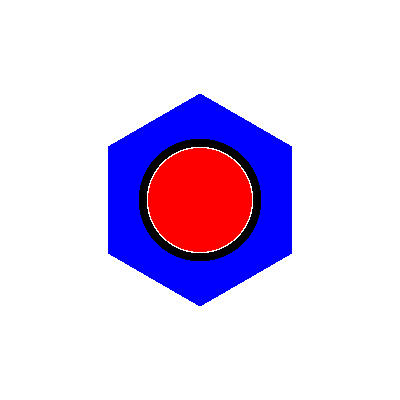

In [18]:
''''
    Ploting the materials and creating a 2D pincell
'''

p = openmc.Plot()
p.filename = 'hexpinplot'
p.width = (3.0, 3.0)
p.pixel = (1200, 1200)
p.color_by = 'material'
p.colors = {uo2: 'red', zirconium: 'black', water: 'blue'}
openmc.plot_inline(p)